In [29]:
# import required packages
import numpy as np

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # For creating plots

In [3]:
# load dataset
bc = load_breast_cancer()

**Question 1**: How many samples and features does the dataset have?
**Solution**: From documentation of [`load_breast_cancer`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) the dataset has 569 samples.
You can verify this in code by executing the code in next cell.

In [5]:
bc.data.shape


(569, 30)

**Question 2**: How many classes does this dataset have?
**Solution**: From documentation of [`load_breast_cancer`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) the dataset has 2 classes.
You can verify this in code by executing the code in next cell.

In [8]:
print(bc.target_names)
len(bc.target_names)


['malignant' 'benign']


2

**Question 3**: Train a Support Vector Machine (SVM) classifier using the re-substitution method. Report your model's performance.
**Solution**: See code in the below cell.

In [6]:
clf = SVC()
clf.fit(bc.data, bc.target)
clf.score(bc.data, bc.target)

0.9226713532513181

**Question 4**: Split the dataset into training and testing?
**Solution**: Refer documentation of [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
An example is shown in the cell below.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)


**Question 5 (i)**: Train a Support Vector Machine (SVM) classifier using the holdout method. Report your model's performance.


In [10]:
clf2 = SVC()
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
clf2.score(x_test, y_test)


0.9210526315789473

**Question 5 (ii)**: Plot the confusion matrix based on the predictions obtained in the previous step.

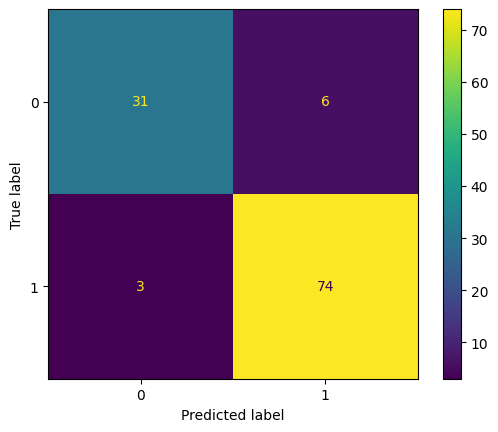

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

**Question 6 (i)**: Create stratified trainng and testing splits using the `stratify` parameter of [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use these splits to train a Support Vector Machine (SVM) classifier using the holdout method. Report your model's performance.

In [12]:
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(bc.data, bc.target, test_size=0.2, stratify=bc.target)
clf3 = SVC()
clf3.fit(x_train_str, y_train_str)
y_pred_str = clf2.predict(x_test_str)
clf3.score(x_test_str, y_test_str)

0.9122807017543859

**Question 6 (ii)**: Plot the confusion matrix based on the predictions obtained in the previous step. What is the impact of stratification on the model#s performance?

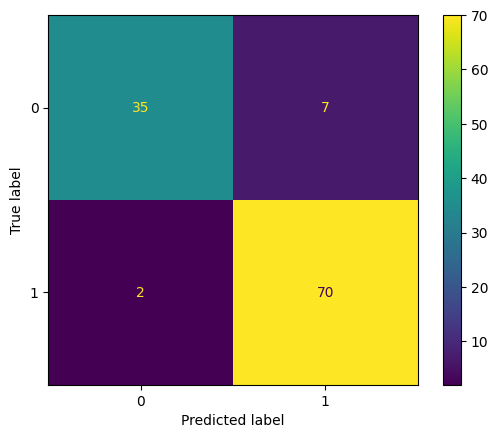

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test_str, y_pred_str)
plt.show()


## Cross Validation (CV)
[This](https://scikit-learn.org/stable/modules/cross_validation.html) page describes CV in scikit-learn.

Of particular interest is this text from the page linked above.
"*When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.*

*However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.*"

**Question 7 (i)** Train a Support Vector Machine (SVM) classifier using CV. Use the method which doesn't involve splitting the dataset into a training and testing split. Report your model's performance.
**Solution**: Refer documentation of [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).
See code below.

In [8]:
clf4 = SVC()
scores = cross_val_score(clf4, bc.data, bc.target)
print(scores.mean(), scores.std())

0.9121720229777983 0.03544367440584207


**Question 7 (ii)** Change your solution for the previous question to use Leave One Out CV. Use the method which doesn't involve splitting the dataset into a training and testing split. Report your model's performance.
**Solution**: Refer documentation of [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split).

In [23]:
kf = KFold(n_splits=bc.target.size)
scores2 = np.zeros(bc.target.size)
i = 0
for train_idx, test_idx in kf.split(bc.data):
    x_train_kfold, x_test_kfold = bc.data[train_idx], bc.data[test_idx]
    y_train_kfold, y_test_kfold = bc.target[train_idx], bc.target[test_idx]

    clf4 = SVC()
    clf4.fit(x_train_kfold, y_train_kfold)
    scores2[i] = clf4.score(x_test_kfold, y_test_kfold)
    i = i + 1

print(scores2.mean(), scores2.std())

0.9121265377855887 0.2831107854760459


**Note**: In the interest of time, I may or may not use CV during our lab sessions. But, you should always use CV for evaluation of any models you build.